# 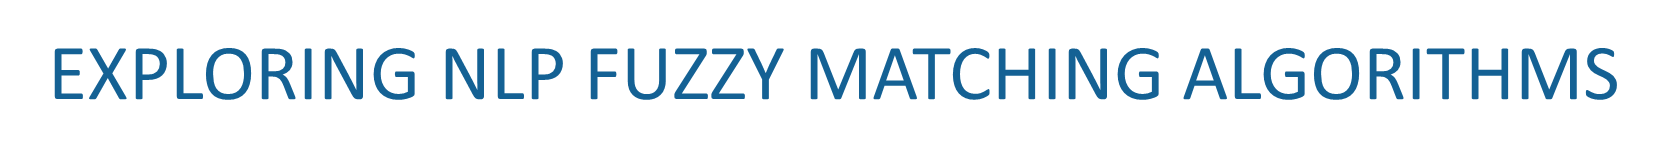

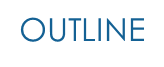

- Introduction to fuzzy matching
- Applications of fuzzy matching
- Algorithms used for fuzzy matching
    - Levenshtein distance algorithm
    - Damerau-Levenshtein distance algorithm
    - Bitmap algorithm 
    - n-gram algorithm
- Implementation of fuzzy matching on real data
- Other algorithms

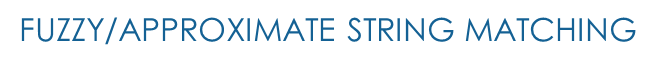

- Method to find strings which match a pattern approximately.
- Identifies the likelihood/probability that two records are true match based on some parameters.

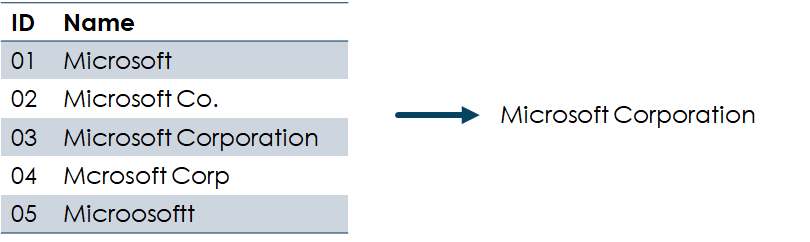

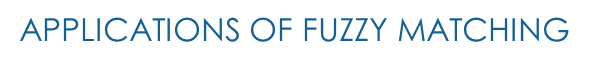

- Spell checker
- Deduplication of records
- Master data management
- Plagiarism detection
- Bioinformatics and DNA sequencing
- Spam filtering
- Content search

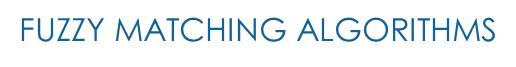

- Edit distance metric - quantifies how dissimilar two strings are by counting the minimum number of operations required to transform one string into the other
    - Levenshtein distance
    - Damerau–Levenshtein distance
- Bitap algorithm - tells whether a given text contains a substring which is "approximately equal" (defined in terms of Levenshtein distance) to a given pattern
- n-gram - predicts next item in a sequence of text (in form of a Markov model)

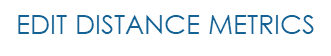

measures the number of edits needed to transform one word into another

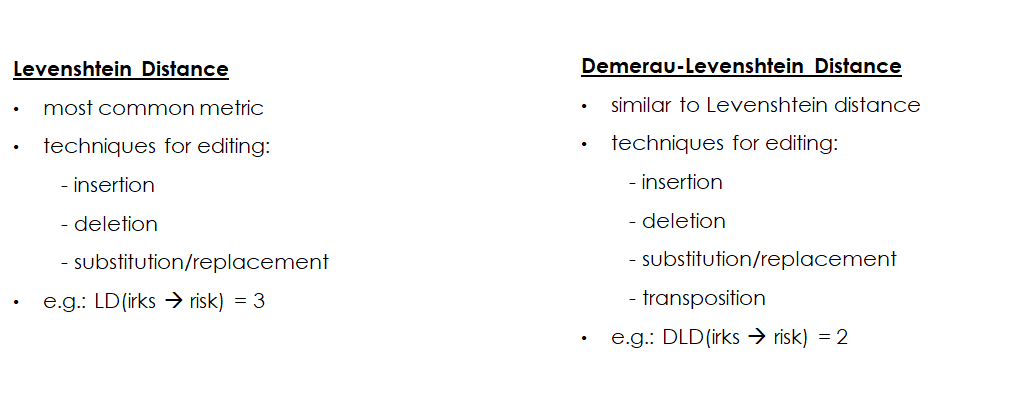

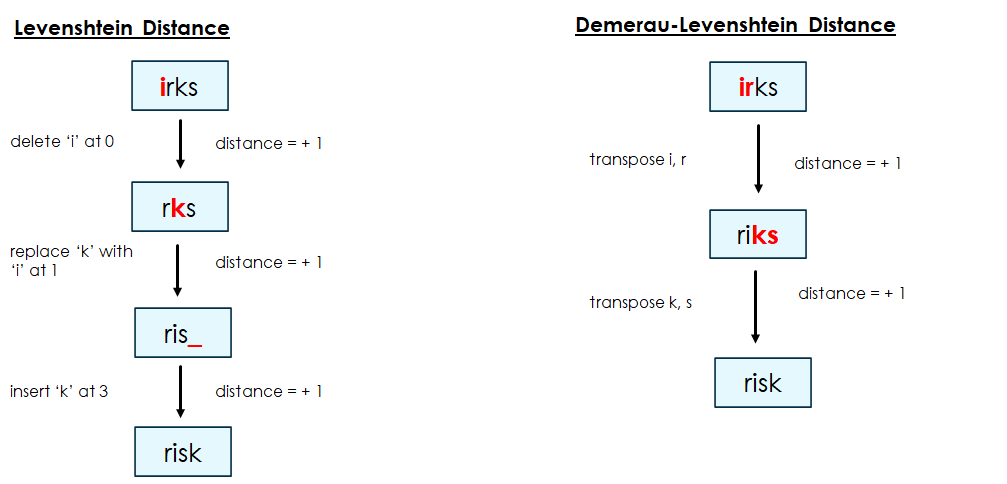

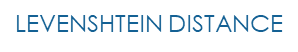

Levenshtein distance has the following properties:

- It is zero if and only if the strings are equal.
- It is at least the difference of the sizes of the two strings.
- It is at most the length of the longer string.
- Triangle inequality: The Levenshtein distance between two strings is no greater than the sum of their Levenshtein distances from a third string.


The Levenshtein distance between two strings a and b is given by leva,b(len(a), len(b)).

The Levenshtein distance between two strings 'a' and 'b', $lev_{a,b}(len(a), len(b))$,
where $lev_{a,b}(i, j)$ is equal to

$$
\begin{array}
& max(i, j) {\quad} if {\quad} min(i, j)=0 \\
{\text{otherwise:}} \\
\\
min \big(lev_{a,b}(i-1, j) + 1, \\
{\qquad} lev_{a,b}(i, j-1) + 1,  \\
{\qquad} lev_{a,b}(i-1, j-1) + 1_{a_i \neq b_j} \big) 
\end{array}    
$$    
where $1_{a_i \neq b_j}$ is the indicator function,
$$\begin{array}
& 1_{a_i \neq b_j} & = 0, {\text{when }} a_i = b_j \\
& = 1, {\text{otherwise}}
\end{array}$$

and $lev_{a,b}(i, j)$ is the distance between the first i characters of 'a' and the first j characters of 'b'.

In [25]:
def levdist(s, t):
    '''function to calculate the
    Levenshtein distance between
    two strings in a recursive way'''
    
    if s == '':
        return len(t)
    if t == '':
        return len(s)
    if s[-1] == t[-1]:
        cost = 0
    else:
        cost = 1
       
    dist = min([levdist(s[:-1], t)+1,
               levdist(s, t[:-1])+1, 
               levdist(s[:-1], t[:-1]) + cost])

    return dist

In [6]:
levdist('irks', 'risk')

3

In [18]:
import time

st = time.time()
s1 = 'micrsft'
s2 = 'microsoft corporation'
print('Levenshtein distance between ',
      f'{s1}', ' and ', f'{s2}', ' is:', levdist(s1, s2))
et = time.time()
print('time taken to calculate Levenshtein distance between ',
      f'{s1}', ' and ', f'{s2}', ' is:', round(et-st, 2), 's')

Levenshtein distance between  micrsft  and  microsoft corporation  is: 14
time taken to calculate Levenshtein distance between  micrsft  and  microsoft corporation  is: 28.02 s


### This is slow! 

### Iterative computation using matrix improves the computation time

In [26]:
def iterative_levdist(s, t):
    '''function to calculate the
    Levenshtein distance between
    two strings in an iterative way'''

    rows = len(s)+1
    cols = len(t)+1
    dist = [[0 for x in range(cols)] for x in range(rows)]

    # source prefixes can be transformed into empty strings 
    # by deletions:
    for i in range(1, rows):
        dist[i][0] = i

    # target prefixes can be created from an empty source string
    # by inserting the characters
    for i in range(1, cols):
        dist[0][i] = i
        
    for col in range(1, cols):
        for row in range(1, rows):
            if s[row-1] == t[col-1]:
                cost = 0
            else:
                cost = 1
            dist[row][col] = min(dist[row-1][col] + 1,      # deletion
                                 dist[row][col-1] + 1,      # insertion
                                 dist[row-1][col-1] + cost) # substitution

 
    return dist[row][col]

In [22]:
iterative_levdist('irks', 'risk')

3

In [23]:
st = time.time()
s1 = 'micrsft'
s2 = 'microsoft corporation'
print('Levenshtein distance between ',
      f'{s1}', ' and ', f'{s2}', ' is:', iterative_levdist(s1, s2))
et = time.time()
print('time taken to calculate Levenshtein distance between ',
      f'{s1}', ' and ', f'{s2}', ' is:', round(et-st, 2), 's')

Levenshtein distance between  micrsft  and  microsoft corporation  is: 14
time taken to calculate Levenshtein distance between  micrsft  and  microsoft corporation  is: 0.0 s


### Damerau-Levenshtein Distance works similar to Levenshtein distance

#### To install jellyfish package, pip install jellyfish
Refer [here](https://pypi.org/project/jellyfish/) for more information on this package

In [35]:
import jellyfish

print('Levenshtein distance is: ', jellyfish.levenshtein_distance('irks', 'risk'))
print('Damerau-Levenshtein distance is: ', jellyfish.damerau_levenshtein_distance('irks', 'risk'))

Levenshtein distance is:  3
Damerau-Levenshtein distance is:  2


In [36]:
st = time.time()
s1 = 'micrsft'
s2 = 'microsoft corporation'
print('Levenshtein distance between ',
      f'{s1}', ' and ', f'{s2}', ' is:', jellyfish.damerau_levenshtein_distance(s1, s2))
et = time.time()
print('time taken to calculate Levenshtein distance between ',
      f'{s1}', ' and ', f'{s2}', ' is:', round(et-st, 2), 's')

Levenshtein distance between  micrsft  and  microsoft corporation  is: 14
time taken to calculate Levenshtein distance between  micrsft  and  microsoft corporation  is: 0.0 s


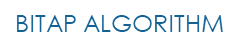

- also known as the shift-or, shift-and or Baeza-Yates–Gonnet algorithm
- states whether a given text contains a substring which is "approximately equal" (defined by Levenshtein distance) to a given pattern.


**Input:**

Text: womenwhocode

Pattern: code

**Output:** 
Pattern found at index: 8

**Input:**

Text: youareawesome 

Pattern: youareamazing

**Output:** No Match

In [28]:
## insert code and logic for this

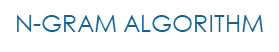

- n-gram: set of values generated from a string by pairing sequentially occurring ‘n’ characters/words
- goal: compute probability of a sequence of characters/words or sentence 
- predicts next item in a sequence of text (in form of a Markov model)

### PROBABILITY 

Conditional probability with 2 variables/words:

$$ \large{p(w_1 \cap w_2) = p(w_1) p(w_2|w_1)}$$

Conditional probability with 4 variables/words:

$$\large{p(w_1 \cap w_2 \cap w_3 \cap w_4) = p(w_1) p(w_2|w_1) p(w_3|w_1 \cap w_2) p(w_4|w_1 \cap w_2 \cap w_3) }$$

Therefore, joint probability can be calculated using chain rule:

$$\Large{ p(w_1 \cap w_2 , \cdots, w_n) = \prod_{i} p (w_i|w_1 w_2 \cdots w_{n-1}) }$$

### &nbsp;&nbsp;&nbsp; TOO MANY POSSIBLE COMBINATIONS!!


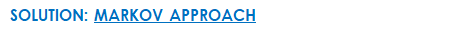

### Approximate each component of the product by maximum likelihood estimate

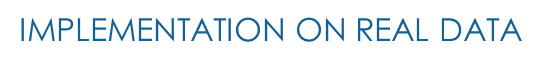

### Download data [here from Kaggle](https://www.kaggle.com/leandrodoze/room-type).

The data contains two columns for room type descriptions. Column 1 is the description from Expedia, and column 2 is the associated room type in Booking.com.

<u> **Aim:**</u> is to compare and match these two columns and the result would be 'human like understanding that the matched entries are same'.

Packages used: 
- fuzzywuzzy (Refer [here](https://pypi.org/project/fuzzywuzzy/) for more information).
- fuzzy_match (Refer [here](https://pypi.org/project/fuzzy-match/) for more information).

In [42]:
# import libraries
import pandas as pd

# this is for fuzzy matching
from fuzzywuzzy import fuzz
from fuzzy_match import algorithims

In [64]:
df = pd.read_csv('room_type.csv')

In [65]:
df.head()

,Expedia,Booking.com
0,"Deluxe Room, 1 King Bed",Deluxe King Room
1,"Standard Room, 1 King Bed, Accessible",Standard King Roll-in Shower Accessible
2,"Grand Corner King Room, 1 King Bed",Grand Corner King Room
3,"Suite, 1 King Bed (Parlor)",King Parlor Suite
4,"High-Floor Premium Room, 1 King Bed",High-Floor Premium King Room


#### RATIO - Compares the entire string similarity

In [66]:
def get_ratio(row):
    
    '''function to compare the values in each row
    for the two columns in the same dataframe and
    return the ratio for the entire string similarity'''
    
    col1 = row['Expedia']
    col2 = row['Booking.com']
    
    return fuzz.ratio(col1, col2)

#### PARTIAL RATIO - Compares partial string similarity

In [67]:
def get_partial_ratio(row):
    
    '''function to compare the values in each row
    for the two columns in the same dataframeand
    return the ratio for partial string similarity'''
    
    col1 = row['Expedia']
    col2 = row['Booking.com']
    
    return fuzz.partial_ratio(col1, col2)

#### TOKEN SORT RATIO - Ignores word order

In [68]:
def get_token_sort_ratio(row):
    
    '''function to compare the values in each row
    for the two columns in the same dataframeand
    return the ratio for string similarity by
    ignoring word order'''
    
    col1 = row['Expedia']
    col2 = row['Booking.com']
    
    return fuzz.token_sort_ratio(col1, col2)

#### TOKEN SET RATIO - Ignore duplicate words similarly to token sort ratio

In [69]:
def get_token_set_ratio(row):
    
    '''function to compare the values in each row
    for the two columns in the same dataframeand
    return the ratio for string similarity by
    ignoring duplicate words and word order'''
    
    col1 = row['Expedia']
    col2 = row['Booking.com']
    
    return fuzz.token_set_ratio(col1, col2)

In [70]:
df['get_ratio'] = df.apply(get_ratio, axis=1)
df['get_partial_ratio'] = df.apply(get_partial_ratio, axis=1)
df['token_sort_ratio'] = df.apply(get_token_sort_ratio, axis=1)
df['token_set_ratio'] = df.apply(get_token_set_ratio, axis=1)
df.head()

,Expedia,Booking.com,get_ratio,get_partial_ratio,token_sort_ratio,token_set_ratio
0,"Deluxe Room, 1 King Bed",Deluxe King Room,62,69,84,100
1,"Standard Room, 1 King Bed, Accessible",Standard King Roll-in Shower Accessible,68,65,78,81
2,"Grand Corner King Room, 1 King Bed",Grand Corner King Room,79,100,80,100
3,"Suite, 1 King Bed (Parlor)",King Parlor Suite,51,65,85,100
4,"High-Floor Premium Room, 1 King Bed",High-Floor Premium King Room,76,82,90,100


###  It looks like TOKEN SET RATIO is the best method to get the most similar matches.

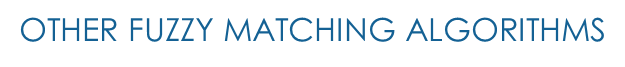

- Edit distance 
    - Longest common subsequence 
    - Hamming distance
    - Jaro distance
- Needleman–Wunsch algorithm
- Smith–Waterman algorithm
- BK Tree metric
- Soundex or Metaphone – phonetic algorithms 

# REFERENCES
1. [Levenshtein, Vladimir I. "Binary codes capable of correcting deletions, insertions, and reversals." In Soviet physics doklady, vol. 10, no. 8, pp. 707-710. 1966.](https://nymity.ch/sybilhunting/pdf/Levenshtein1966a.pdf)
2. [Damerau, Fred J. "A technique for computer detection and correction of spelling errors." Communications of the ACM 7, no. 3 (1964): 171-176.](https://dl.acm.org/doi/abs/10.1145/363958.363994)
3. [Cayrol, M., Farreny, H. and Prade, H. (1982), 'Fuzzy Pattern Matching', Kybernetes, Vol. 11 No. 2, pp. 103-116.](https://doi.org/10.1108/eb005612)
4. [Ukkonen, Esko. "Algorithms for approximate string matching." Information and control 64, no. 1-3 (1985): 100-118.](https://reader.elsevier.com/reader/sd/pii/S0019995885800462?token=6B1FB04FFCA70F0F9A2AAB96C6311FAA5E93FFB7F1C1B4A75A61D72728A2B6A655B4944421AD983395F0B11AAB73F520&originRegion=us-east-1&originCreation=20210331153641)
5. [Geek for Geeks - applications of fuzzy string matching](https://www.geeksforgeeks.org/applications-of-string-matching-algorithms/)
6. [Geek for Geeks - Bitap Algorithm](https://www.geeksforgeeks.org/java-program-to-implement-bitap-algorithm-for-string-matching/)
7. [Stanford slides on n-gram](https://web.stanford.edu/~jurafsky/slp3/slides/LM_4.pdf)
8. [Data camp tutorial - fuzzy string matching](https://www.datacamp.com/community/tutorials/fuzzy-string-python)
9. [Levenshtein distance theory](https://www.python-course.eu/levenshtein_distance.php)
10. [Article on record linking and fuzzy matching](https://pbpython.com/record-linking.html)
11. [Medium post on Levenshtein distance](https://blog.paperspace.com/measuring-text-similarity-using-levenshtein-distance/)
12. https://www.rosette.com/blog/overview-fuzzy-name-matching-techniques/